In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving train.csv to train.csv


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
y = df["Survived"]
y.head()
X = df
X.shape

(891, 12)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
X["Age"].fillna(X["Age"].mean(), inplace = True)
df1["Age"].fillna(df1["Age"].mean(), inplace = True)

In [10]:
X["FamSize"] = X["SibSp"] + X["Parch"] + 1
df1["FamSize"] = df1["SibSp"] + df1["Parch"] + 1

In [11]:
X["FamSize"].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamSize, dtype: float64

In [12]:
X[["FamSize", "Survived"]].groupby(["FamSize"]).mean().sort_values(by="Survived", ascending=False)

,Survived
FamSize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [13]:
def getFamType(var):
  if(var == 1): return "alone"
  elif(var <= 4): return "small"
  else: return "large"

In [14]:
X["FamType"] = X.apply(lambda x : getFamType(x.FamSize), axis = 1)
df1["FamType"] = X.apply(lambda x : getFamType(x.FamSize), axis = 1)

In [15]:
X[["FamType", "Survived"]].groupby(["FamType"]).mean().sort_values(by="Survived", ascending=False)

,Survived
FamType,
small,0.578767
alone,0.303538
large,0.161290


In [45]:
# X[["Cabin", "Survived"]].groupby(["Cabin"]).mean().sort_values(by="Survived", ascending=False)
X["Floor"] = X["Cabin"]
X["Floor"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Floor, Length: 891, dtype: object

In [46]:
def getFloor(var):
  if(type(var) != str):
    var = str(var)
  if(var == "n"): return "no_floor"
  else: return var[0]

In [47]:
X["Cabin"].fillna("no_floor")
df1["Cabin"].fillna("no_floor")
X["Floor"] = X.apply(lambda x : getFloor(x["Cabin"]), axis = 1)
df1["Floor"] = X.apply(lambda x : getFloor(x["Cabin"]), axis = 1)

In [48]:
X["Floor"].head()

0    n
1    C
2    n
3    C
4    n
Name: Floor, dtype: object

In [49]:
drop_col = ["Name", "Ticket", "Cabin", "SibSp", "Parch", "FamSize"]
X.drop(drop_col, axis = 1, inplace = True)
df1.drop(drop_col, axis = 1, inplace = True)

In [50]:
X = pd.get_dummies(X, drop_first = True)
df1 = pd.get_dummies(df1, drop_first = True)

In [51]:
X.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamType_large,FamType_small,Floor_B,Floor_C,Floor_D,Floor_E,Floor_F,Floor_G,Floor_T,Floor_n
0,1,0,3,22.0,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,1
1,2,1,1,38.0,71.2833,0,0,0,0,1,0,1,0,0,0,0,0,0
2,3,1,3,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,53.1000,0,0,1,0,1,0,1,0,0,0,0,0,0
4,5,0,3,35.0,8.0500,1,0,1,0,0,0,0,0,0,0,0,0,1


In [52]:
df1.head()

,PassengerId,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamType_large,FamType_small,Floor_B,Floor_C,Floor_D,Floor_E,Floor_F,Floor_G,Floor_T,Floor_n
0,892,3,34.5,7.8292,1,1,0,0,1,0,0,0,0,0,0,0,1
1,893,3,47.0,7.0000,0,0,1,0,1,0,1,0,0,0,0,0,0
2,894,2,62.0,9.6875,1,1,0,0,0,0,0,0,0,0,0,0,1
3,895,3,27.0,8.6625,1,0,1,0,1,0,1,0,0,0,0,0,0
4,896,3,22.0,12.2875,0,0,1,0,0,0,0,0,0,0,0,0,1


In [53]:
X.drop("Survived", axis = 1, inplace = True)

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [55]:
N, D = x_train.shape

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
df1 = scaler.transform(df1)

In [58]:
import tensorflow as tf

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D, )),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [60]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [61]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200)

Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 0.9371 - accuracy: 0.4326 - val_loss: 0.8712 - val_accuracy: 0.4664
Epoch 2/200
21/21 [==============================] - 0s 4ms/step - loss: 0.9113 - accuracy: 0.4671 - val_loss: 0.8481 - val_accuracy: 0.4843
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.8873 - accuracy: 0.4955 - val_loss: 0.8270 - val_accuracy: 0.5291
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 0.8652 - accuracy: 0.5060 - val_loss: 0.8077 - val_accuracy: 0.5336
Epoch 5/200
21/21 [==============================] - 0s 4ms/step - loss: 0.8447 - accuracy: 0.5165 - val_loss: 0.7898 - val_accuracy: 0.5381
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.8257 - accuracy: 0.5329 - val_loss: 0.7734 - val_accuracy: 0.5740
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.8076 - accuracy: 0.5479 - val_loss: 0.7586 - val_accuracy: 0.5740
Epoch 8/200


In [62]:
print(model.evaluate(x_train, y_train))

21/21 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8368
[0.401002436876297, 0.8368263244628906]


In [63]:
print(model.evaluate(x_test, y_test))

7/7 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.7937
[0.49057069420814514, 0.7937219738960266]


In [64]:
y_pred = model.predict(df1)

14/14 [==============================] - 0s 2ms/step


In [65]:
import matplotlib.pyplot as plt

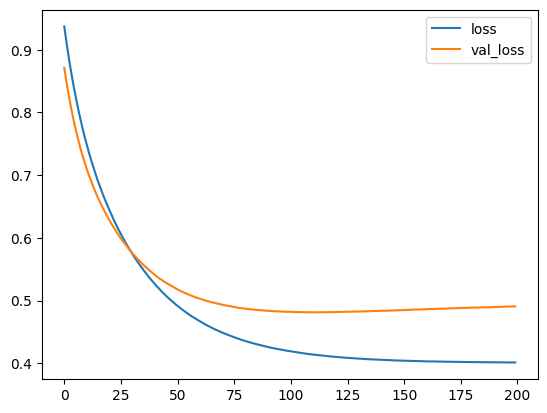

In [67]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

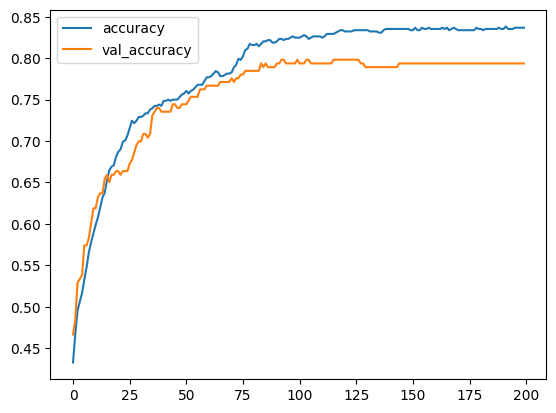

In [68]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [69]:
pred = pd.DataFrame(y_pred, columns = ['Survived']).to_csv('predictions.csv')